# Image Analysis - Topic 01- Toy Datasets

## Lesson Learning Outcome

Image Analysis Lesson consists of three topics

By the end of this lesson, you should be able to:
- Evaluate Label Distribution
- Perform an Image Montage
- Check Average Image and Image Variability
- Check the contrast between two average images
- Work with toy and real datasets
- Understand the differences in terms of folder structure when downloading real image datasets

## Topic Objectives

Use a built-in toy dataset to explore label distribution, image montage, average image, image variability and contrast between two average images.

Data Analytics has incredible applications when dealing with images, either static, like a photo, or dynamic, like a video.

### Why do we study Image Analysis?

Because it is part of an effective EDA (Exploratory Data Analysis) on images to perform tasks like understanding label distribution, conducting an image montage, compute average image and image variability.

### Additional Learning Context

We encourage you to:
- Add code cells and try out other possibilities, play around with parameter values in a function/method, or consider additional function parameters, etc.
- Also, add your own comment in the cells. It can help you to consolidate your learning.

### Parameters in given function/method

As you may expect, a given function in a package may contain multiple parameters.
Some are mandatory to declare, some have pre-defined values, and some are optional. We will cover the most common parameters used/employed in Data Analytics for a particular function/method.
However, you may seek additional in the respective package documentation, where you will find instructions on how to use a given function/method. The studied packages are open source, so this documentation is public.

### Import Packages for Learning

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools

sns.set_style("white")

## Image Analysis - Toy Dataset

We haven't studied the TensorFlow Python package, but we will use TensorFlow toy datasets in this lesson. These datasets are used for learning, meaning they will be useful for understanding the concepts of Image analysis.

Later in this lesson, we will use real images, which require additional processes before they can be analysed.
For now, we will use a dataset called mnist, which is a collection of handwritten numbers from 0 to 9, all in 28 x 28 pixels

We will load the data into a train and test sets.

In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Let's check the train and test set size

We will notice the image has only one channel (greyscale).
If it were coloured, it would show (60000, 28, 28, 3) for RGB or (60000, 28, 28, 4) for RGBA

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


As we expect, the data is a NumPy array.

In [6]:
type(x_train)

numpy.ndarray

We are using the function plt.imshow() to display a given image. The documentation is found here

We will subset the array using a pointer (num variable). We randomly choose 27
plt.imshow() gets the array to be displayed, and, in this case, we set cmap='gray' since it is a greyscale image
We can see the number in the image and the respective actual value in the y_train

array pointer = 27
x_train[27] shape: (28, 28)
label: 3


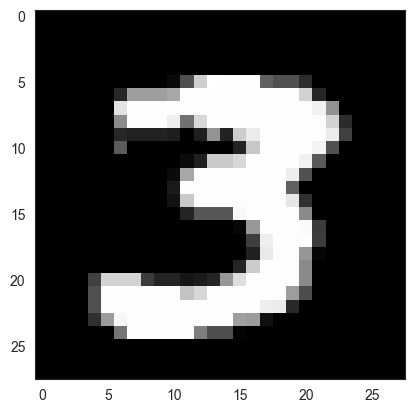

In [7]:
pointer = 27

print(f"array pointer = {pointer}")
print(f"x_train[{pointer}] shape: {x_train[pointer].shape}")
print(f"label: {y_train[pointer]}")

plt.imshow(x_train[pointer],cmap='gray')
plt.show()

PRACTICE play around with pointer by setting it to other values.

What is the max value you can use in this case?
Also, remove cmap='gray' and check the difference. When you don't set this parameter, it will show the default option: 'viridis'.

You can use set() to check the unique values in an array. That allows us to understand the labels present in the train set.

In [8]:
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

In the cell below, assign a value to a variable named pointer

Use plt.imshow, x_train, pointer, and cmap
Show plt

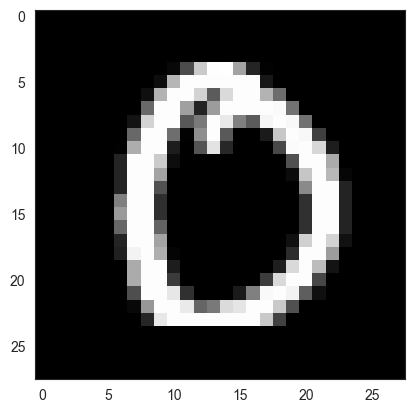

In [24]:
# Write your code here.
pointer = 88
plt.imshow(x_train[pointer],cmap='gray')
plt.show()

## Labels Distribution

We will use the convention label, as the levels or classes in an image dataset.

For example, in mnist dataset, the labels are 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
We are interested in knowing if the target variable is balanced and understanding if the labels have similar frequency levels.

We assess that with .value_counts() and a bar plot.
We first convert the y_train array to a Pandas Series, then count the values, sort the index and plot with Pandas
We notice the labels are fairly distributed.

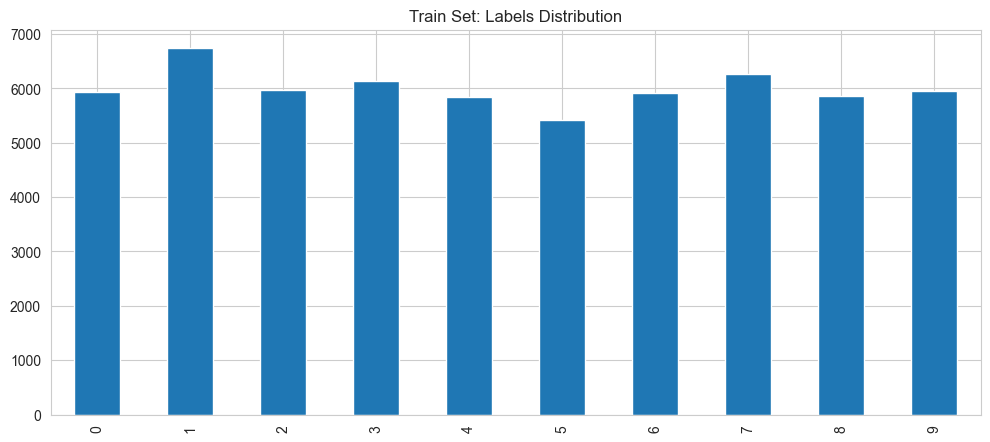

In [10]:
sns.set_style('whitegrid')
pd.Series(data=y_train).value_counts().sort_index().plot(kind='bar',figsize=(12,5))
plt.title("Train Set: Labels Distribution")
plt.show()

## Image Montage

An Image Montage aims to display a grid of images per label

We created a custom function for this task. We will not describe the specifics of the function. The function was made using the knowledge covered in the course and functionalities for creating a list with indices pair to plot in the image grid and randomly subset several images to be displayed

The function arguments are:

X: NumPy array with image data,
y: NumPy array with target value, label_to_display,
nrows and ncols to define the grid structure and
figsize.
Read the pseudo-code to understand the function capabilities better

It is reasonable if, at first, you don't understand all the code in the function below. The important point is to make sense of the pseudo-code and understand the function parameters.

In [11]:
def image_montage_data_as_array(X, y, label_to_display, nrows, ncols, figsize=(15, 10)):
    """
    Display a montage of images from a subset of data based on a specific label.

    Parameters:
    ----------
    X : array-like
        The input data array containing the images.
    y : array-like
        The target array containing the labels for each image.
    label_to_display : int or str
        The label to display in the montage. If the label is not present in the target array, a montage with all labels will be shown.
    nrows : int
        The number of rows in the montage grid.
    ncols : int
        The number of columns in the montage grid.
    figsize : tuple, optional
        The size of the figure in inches (width, height). Default is (15, 10).

    Returns:
    -------
    None

    Notes:
    ------
    - The function subsets the data based on the specified label and displays a montage of images from that subset.
    - If the specified label is not present in the target array, a montage with all labels will be shown.
    - The function checks if the size of the montage grid is greater than the size of the subset. If not, it displays a message suggesting to decrease the number of rows or columns in the grid.

    """
    sns.set_style("white")

    # subset the label you are interested in displaying
    if label_to_display in np.unique(y):
        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        df = X[boolean_mask]

    # if that label is not in the data, it shows a montage with all labels
    else:
        print("The class you selected doesn't exist.")
        print(f"The existing options are: {np.unique(y)}")
        print("Find below a montage with all labels")
        df = X

    # checks if your montage space is greater than subset size
    if nrows * ncols < df.shape[0]:
        img_idx = random.sample(range(0, df.shape[0]), nrows * ncols)
    else:
        print(
            f"Decrease nrows or ncols to create your montage. \n"
            f"There are {df.shape[0]} in your subset. "
            f"You requested a montage with {nrows * ncols} spaces"
        )
        return

    # create a list of axes indices based on nrows and ncols
    list_rows = range(0, nrows)
    list_cols = range(0, ncols)
    plot_idx = list(itertools.product(list_rows, list_cols))

    # create a Figure and display images
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for x in range(0, nrows * ncols):
        axes[plot_idx[x][0], plot_idx[x][1]].imshow(df[img_idx[x]], cmap="gray")
    plt.tight_layout()
    plt.show()

Let's display the label 8, in a 3 x 5 grid.

Note how different the number 8 can be written!

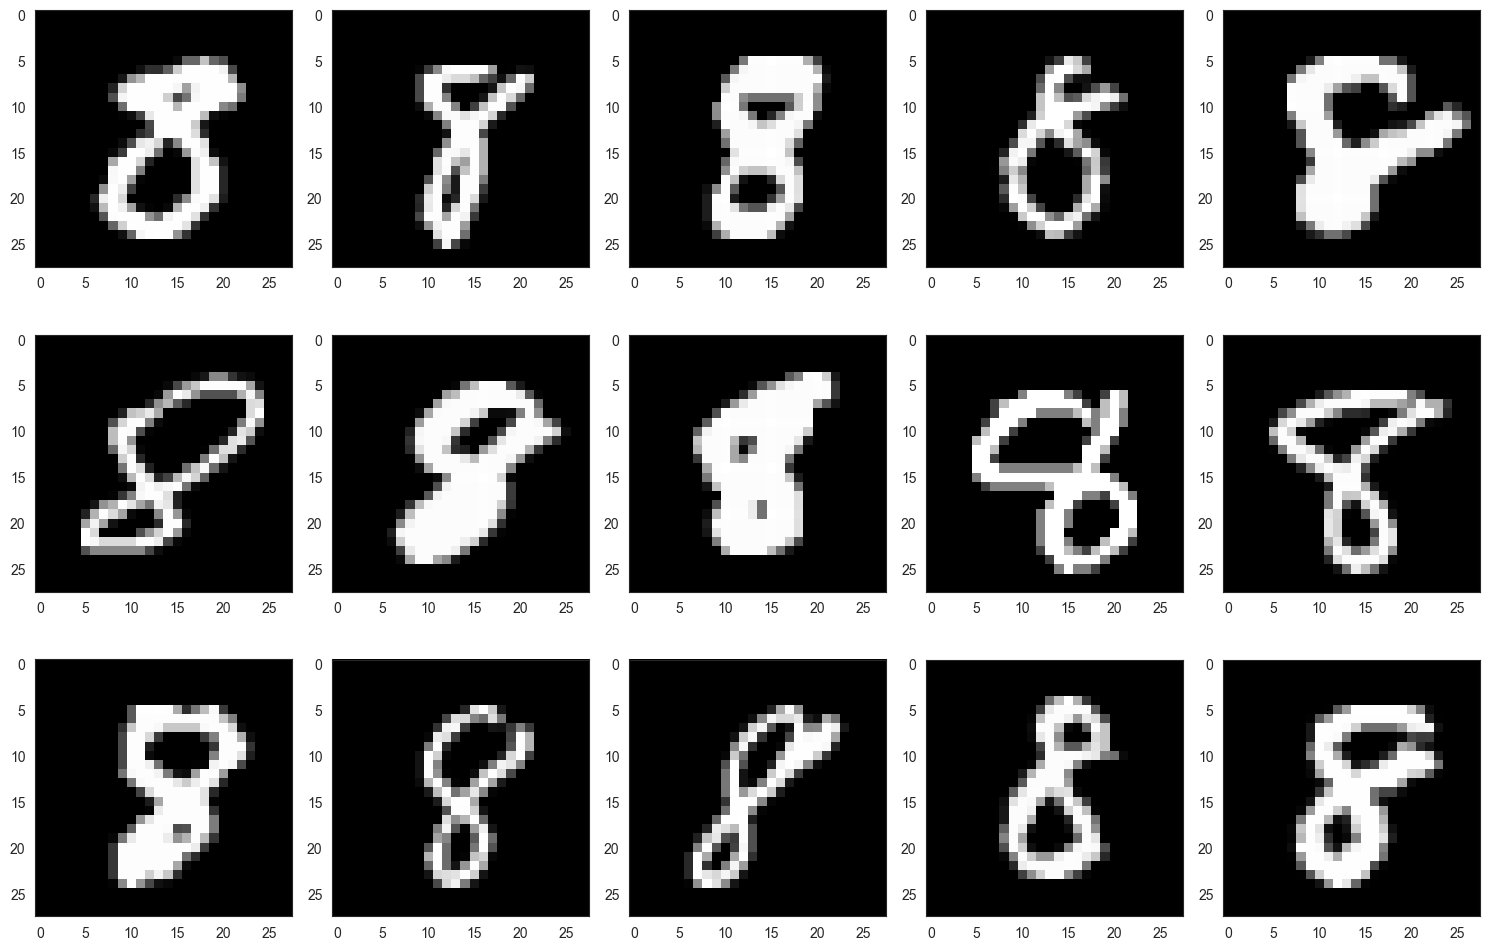

In [12]:
image_montage_data_as_array(X=x_train, y=y_train,
              label_to_display=8,
              nrows=3, ncols=5,
              figsize=(15,10))

Do an exercise and change the label value.

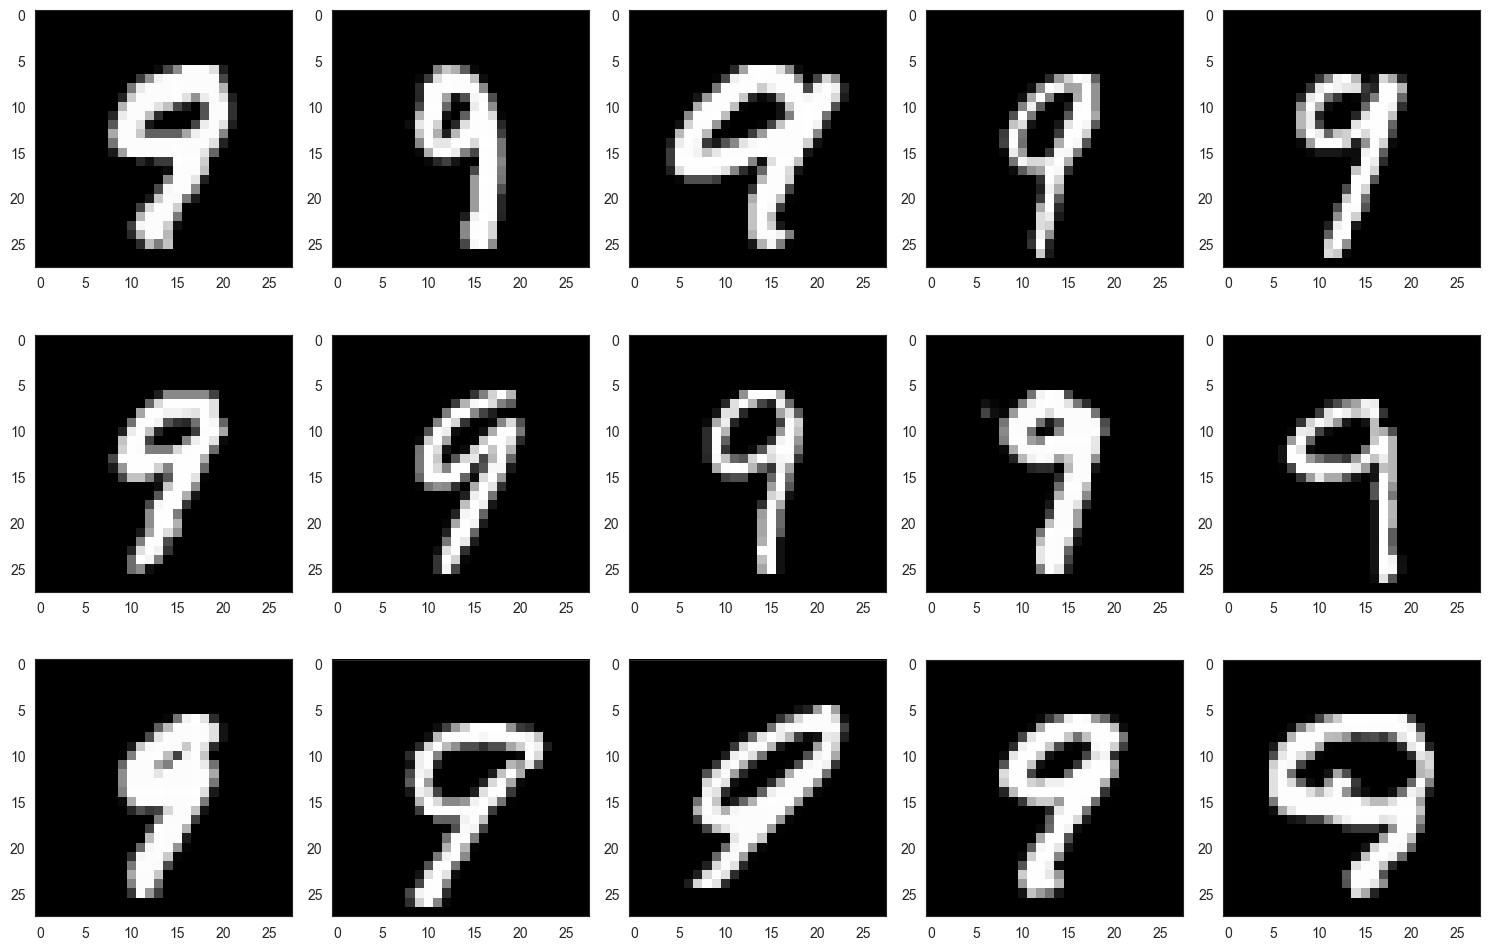

In [13]:
image_montage_data_as_array(X=x_train, y=y_train,
              label_to_display=9,
              nrows=3, ncols=5,
              figsize=(15,10))

PRACTICE We will use another builtin dataset from TensorFlow

In [14]:
from tensorflow.keras.datasets import fashion_mnist
(x_practice, y_practice), (x_practice_test, y_practice_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Label Description

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Use your existing knowledge to asses the label distribution.

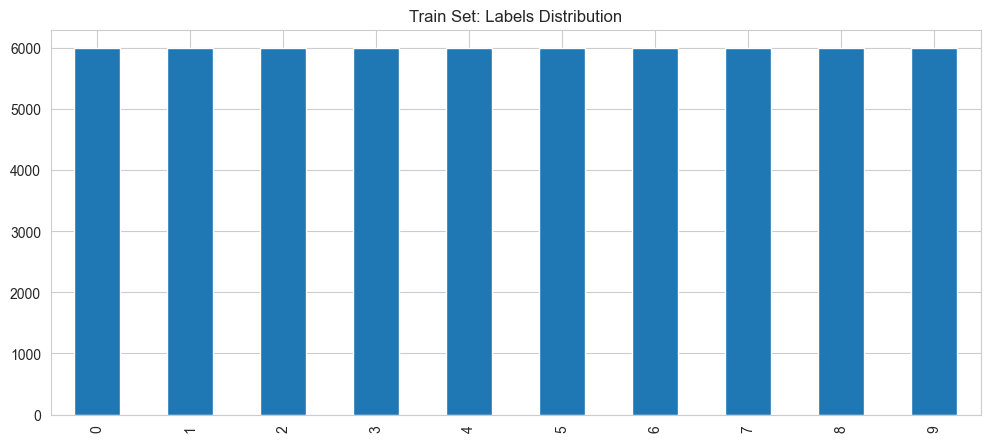

In [27]:
# write the code here to assess label distribution

sns.set_style('whitegrid')
pd.Series(data=y_practice).value_counts().sort_index().plot(kind='bar',figsize=(12,5))
plt.title("Train Set: Labels Distribution")
plt.show()

In the following cell, call the image_montage_data_as_array custom function to make an image montage

choose a label from 0-9

In [16]:
# Write your code here.

## Average Image and Image Variability per Label

We noticed that for each label, the images would be slightly different from each other, but in general, we expect them to have a pattern

An Average Image and Image Variability per label helps to study these patterns

An average image is when you subset all data (NumPy arrays) from a given label and calculate the average from the array values
Image Variability is when you subset all data (NumPy arrays) from a given label and calculate the standard deviation from the array values
Read the pseudo-code to understand the function capabilities better

It is reasonable if, at first, you don't understand all the code from the function below. The important point is to make sense of the pseudo-code and understand the function parameters.

In [17]:
def image_avg_and_variability_data_as_array(X, y, figsize=(12, 5)):
    """
    Calculate the average and variability of images for each label in the dataset and display the results.

    Parameters:
    X (numpy.ndarray): The input array of images.
    y (numpy.ndarray): The array of labels corresponding to each image.
    figsize (tuple, optional): The size of the figure to display the images. Defaults to (12, 5).

    Returns:
    None

    The pseudo-code for the function is:
    * Loop through all labels
    * Subset an array for a given label
    * Calculate the average and standard deviation
    * Create a Figure displaying the average and variability image
    """
    sns.set_style("white")

    for label_to_display in np.unique(y):

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average Image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap="gray")
        axes[1].set_title(f"Image Variability for label {label_to_display}")
        axes[1].imshow(std_img, cmap="gray")
        plt.show()
        print("\n")

To help with the interpretation, consider the following guide:

Check for the patterns where the colour is darker or lighter
For Average Image, we notice the general patterns for a given label
For Image Variability, the lighter area indicates higher variability in that area. For example, for zero, we see the middle is black (meaning all zeros tend not to have the middle filled), and a circled area is white (meaning the images tend to vary in this circled area)
You will notice that the plots complement each other since both, from different angles, show the image patterns

==== Label 0 ====
Image Shape: (28, 28)


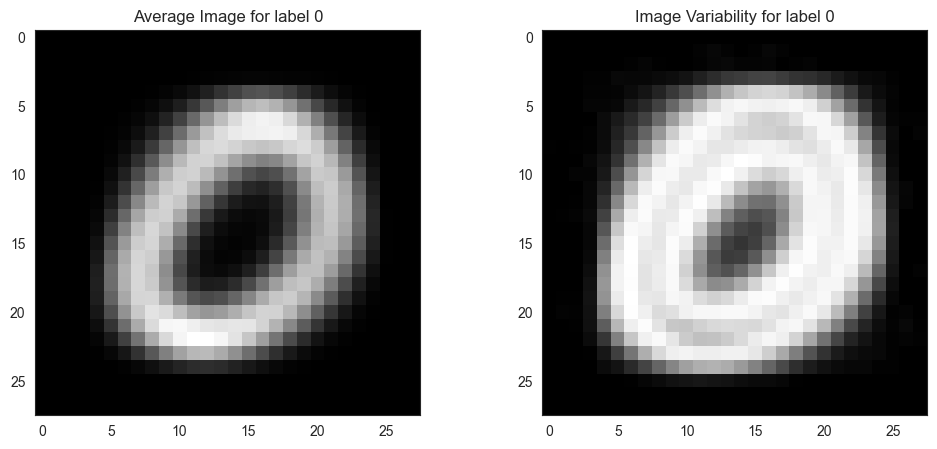



==== Label 1 ====
Image Shape: (28, 28)


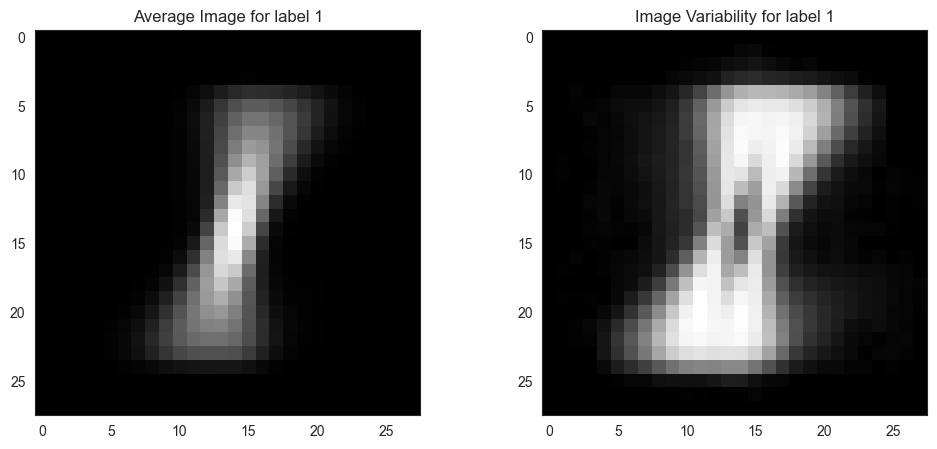



==== Label 2 ====
Image Shape: (28, 28)


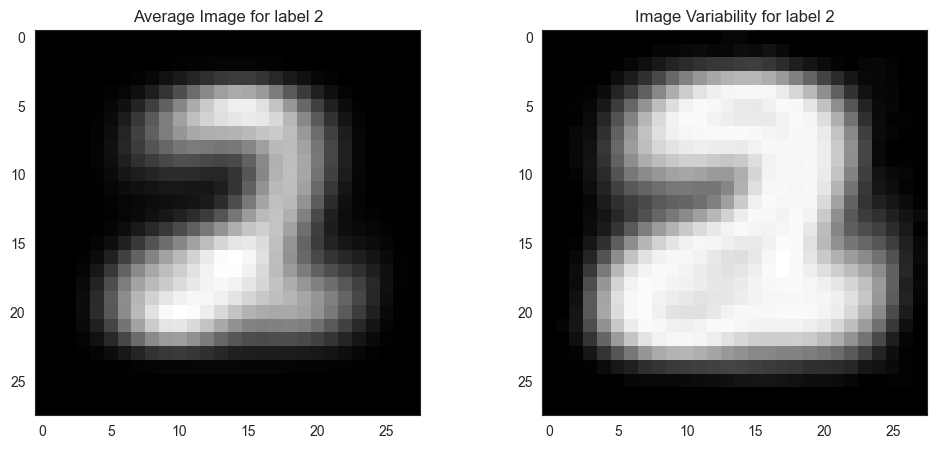



==== Label 3 ====
Image Shape: (28, 28)


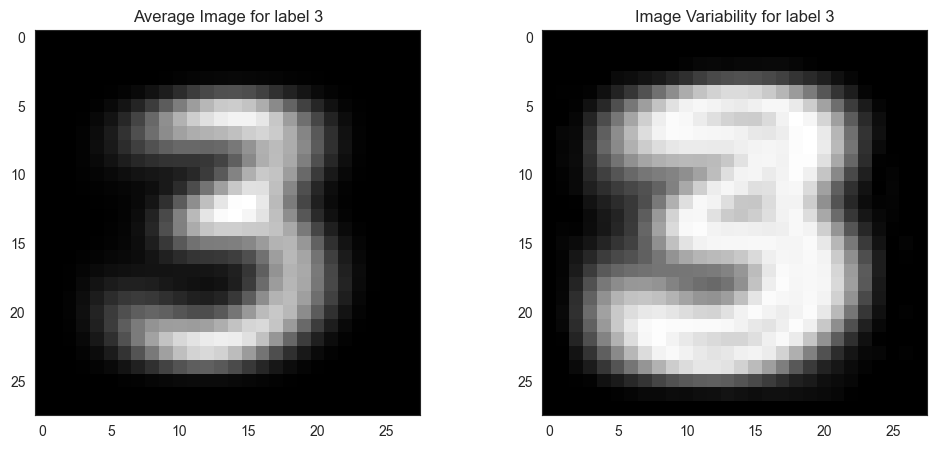



==== Label 4 ====
Image Shape: (28, 28)


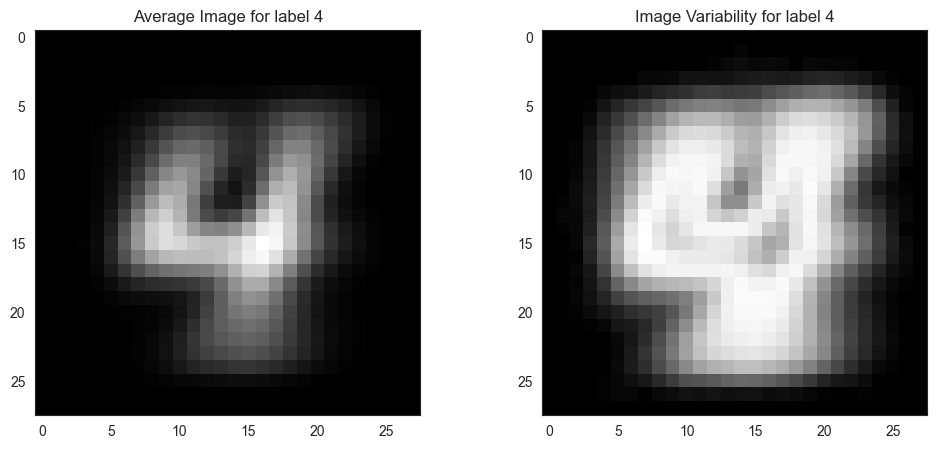



==== Label 5 ====
Image Shape: (28, 28)


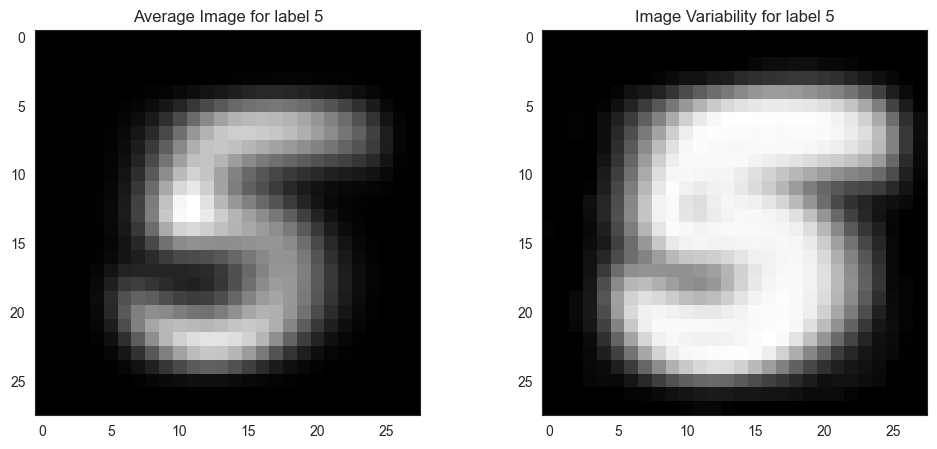



==== Label 6 ====
Image Shape: (28, 28)


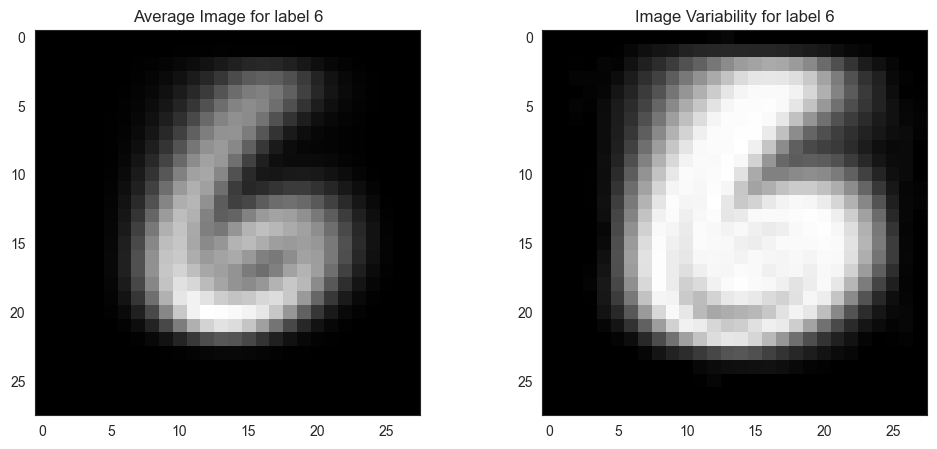



==== Label 7 ====
Image Shape: (28, 28)


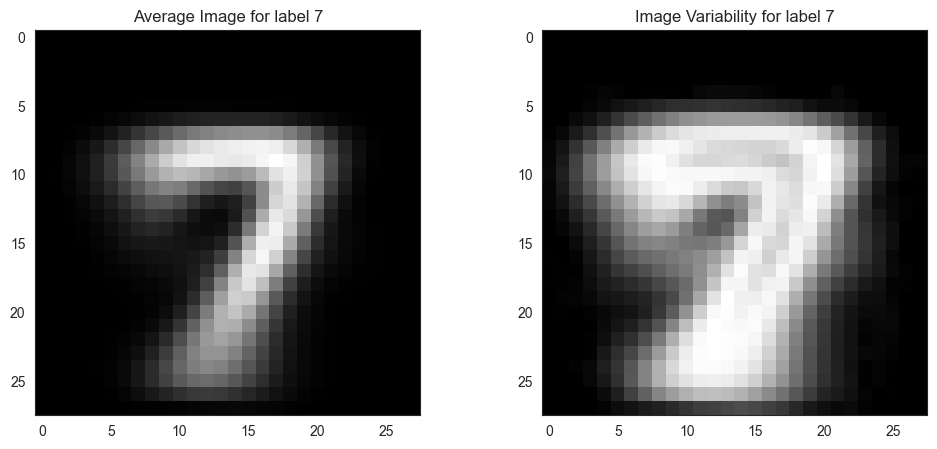



==== Label 8 ====
Image Shape: (28, 28)


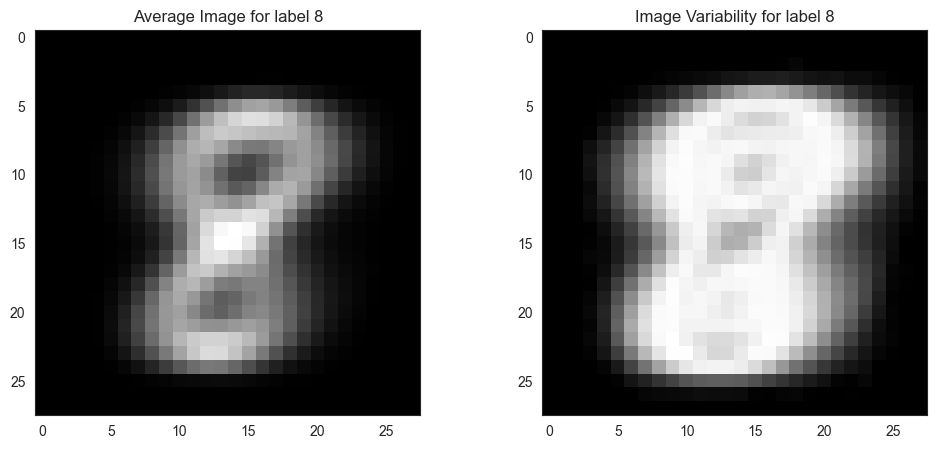



==== Label 9 ====
Image Shape: (28, 28)


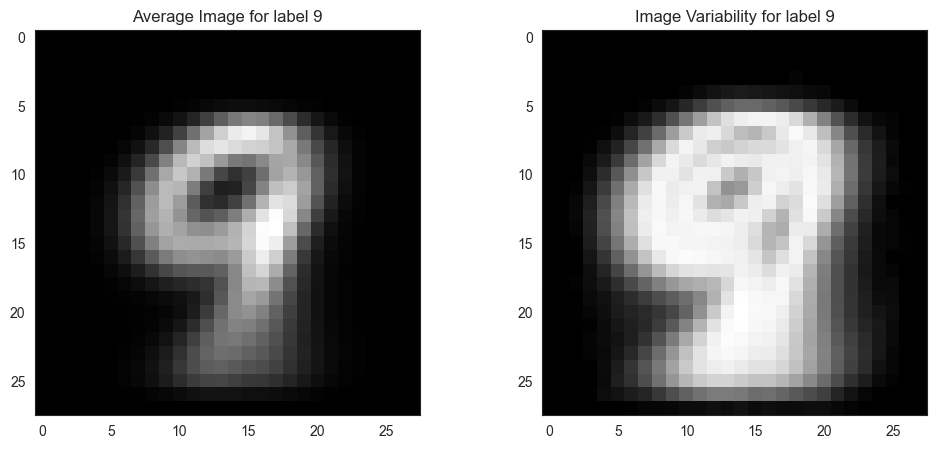

In [18]:
image_avg_and_variability_data_as_array(X=x_train, y=y_train, figsize=(12,5))

Note: There will be datasets where the images in a given label will have distinct shapes or patterns, and an average and variability study may not give the same amount of insights as we see in the mnist dataset

For example, a dataset may contain images of fish and birds from multiple species.

If you subset fish and calculate an average image, the result will be a combination of patterns from multiple fish species that may confuse a user unfamiliar with the context.

## Contrast between 2 Labels

Here we are interested in evaluating the contrast between the two labels.

Which may provide additional insight into how the labels differ from each other

We created a custom function contrast_between_2_labels_data_as_array() that computes that. The arguments are X, for the image data in the NumPy array, y as the array indicating the label; label_1 and label_2 as the labels you are interested in comparing and figsize to set figure size

It is reasonable if you need help understanding all the code from the function below at first. The central point is to make sense of the pseudo-code and understand the function parameters.

In [19]:
def subset_image_label(X, y, label_to_display):
    """
    Subsets the input data based on a specific label.

    Parameters:
    X (array-like): The input data array.
    y (array-like): The labels array.
    label_to_display: The label to subset the data on.

    Returns:
    array-like: The subset of the input data where the labels match the specified label_to_display.
    """
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df


def contrast_between_2_labels_data_as_array(X, y, label_1, label_2, figsize=(12, 5)):
    """
    Calculate and plot the contrast between two labels in a dataset.

    Parameters:
    - X (array-like): The input data array.
    - y (array-like): The labels corresponding to the input data.
    - label_1 (int or str): The first label to compare.
    - label_2 (int or str): The second label to compare.
    - figsize (tuple, optional): The size of the figure. Defaults to (12, 5).

    Returns:
    None
    """
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(f"Either label {label_1} or label {label_2}, are not in {np.unique(y)} ")
        return

    # calculate mean from label1
    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)

    # calculate mean from label2
    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label, axis=0)

    # calculate difference and plot difference, avg label1 and avg label2
    contrast_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(contrast_mean, cmap="gray")
    axes[0].set_title(f"Difference Between Averages: {label_1} & {label_2}")
    axes[1].imshow(label1_avg, cmap="gray")
    axes[1].set_title(f"Average {label_1}")
    axes[2].imshow(label2_avg, cmap="gray")
    axes[2].set_title(f"Average {label_2}")
    plt.show()

To help the interpretation, consider the following guide:

You are comparing label_1 to label_2
In the Difference Between Averages plot, the darker area shows where the average images are similar, and the lighter area shows where they are different.

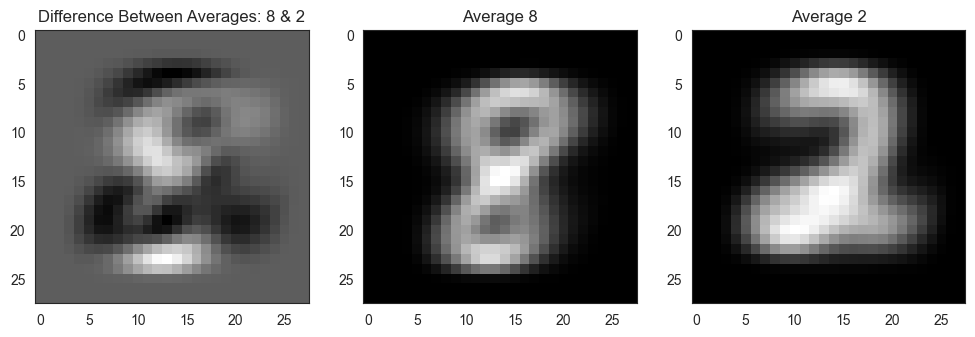

In [20]:
contrast_between_2_labels_data_as_array(X=x_train, y=y_train,
                                        label_1=8, label_2=2,
                                        figsize=(12,10)
                                        )

The same note from the previous section applies here:

There will be datasets where the images in a given label will have distinct shapes or patterns, and a contrast-from-averages study may not provide the same amount of insights as we see in mnist dataset

PRACTICE Use your existing knowledge to assess the

average image, image variability per label,
and contrast between labels for x_practice and y_practice data

In [21]:
# write the code here to assess average image, image variability

In [22]:
# write the code here for the contrast between 2 labels 
# We suggest you try with a few pairs of labels so that you can get comfortable with the data